# **Sentiment Analysis**

**1. Import Libraries**
    
   We are going to import Python Libraries for data handling, text processing, visualization, and model testing.


In [1]:
#Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split

**2. Load the Dataset**

   Loading the CSV file into a DataFrame and check the top rows to understand its structure and column names.

In [2]:
#Load your dataset
df = pd.read_csv("/content/product_reviews_1000.csv")

#Preview first few rows of the dataset
df.head()

,User ID,User Name,Window,Label,Review Text
0,U0001,Karan Singh,Flipkart,Neutral,The color is slightly different from the pictu...
1,U0002,Pooja Sethi,Amazon,Negative,The product arrived damaged and unusable.
2,U0003,Anjali Kapoor,Amazon,Positive,Excellent build quality and fast performance.
3,U0004,Anjali Kapoor,Amazon,Neutral,"The product is okay, works as described but no..."
4,U0005,Rohit Yadav,Amazon,Positive,"Lightweight and easy to use, definitely worth ..."


**3.Data Preprocessing**

Cleaning the textual data by converting it to lowecase, removing, symbols, and removing stopwords to prepare it for analysis.

In [4]:
# Download stopwords for removing comon words like 'the', 'and', etc.
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop = stopwords.words('english')

#Functions to clean review test
def clean_text(text):
  text = str(text).lower()

#Conert to lowercase
  text = re.sub(r'[^a-z\s]', '', text)

# Remove punctuation, numbers, and special characters
  text = ' '.join(word for word in text.split() if word not in stop)
  return text

#Apply cleaning to review column
df['Cleaned Review Text'] = df['Review Text'].apply(clean_text)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,User ID,User Name,Window,Label,Review Text,Cleaned Review Text
0,U0001,Karan Singh,Flipkart,Neutral,The color is slightly different from the pictu...,color slightly different pictures still fine
1,U0002,Pooja Sethi,Amazon,Negative,The product arrived damaged and unusable.,product arrived damaged unusable
2,U0003,Anjali Kapoor,Amazon,Positive,Excellent build quality and fast performance.,excellent build quality fast performance
3,U0004,Anjali Kapoor,Amazon,Neutral,"The product is okay, works as described but no...",product okay works described nothing exceptional
4,U0005,Rohit Yadav,Amazon,Positive,"Lightweight and easy to use, definitely worth ...",lightweight easy use definitely worth price


**4. Split Data (Train-Test Spit)**

we divide the dataset into two parts -


*   Training data (80%): used to build the model
*   Testing Data (20%): used to evaluate model performance.

In [5]:
#Split dataset into training and testing part (80%-20%)
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
print("Training samples:", len(train_data))
print("Testing samples:", len(test_data))

Training samples: 800
Testing samples: 200


**5. Sentiment Analysis (Model Implementation)**

We use the VADER Sentiment Analyzer to classify text as Positive, Negative, or Neutral based on sentiment score.

In [6]:
# Download VADER lexicon
nltk.download('vader_lexicon')

#Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

#Function to classify sentiment
def get_sentiment(text):
  if isinstance(text, str):
    sentiment_scores = sia.polarity_scores(text)
    compound_score = sentiment_scores['compound']
    if compound_score > 0:
        return 'Positive'
    elif compound_score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Cleaned Review Text'].apply(get_sentiment)

print(df[['Review Text', 'Sentiment']])

                                           Review Text Sentiment
0    The color is slightly different from the pictu...  Positive
1            The product arrived damaged and unusable.  Negative
2        Excellent build quality and fast performance.  Positive
3    The product is okay, works as described but no...  Positive
4    Lightweight and easy to use, definitely worth ...  Positive
..                                                 ...       ...
995  Customer service was unhelpful when I tried to...   Neutral
996  Lightweight and easy to use, definitely worth ...  Positive
997  Completely disappointed — it stopped working a...  Negative
998                     Very slow and lags constantly.  Negative
999  Packaging was fine, but delivery took longer t...  Positive

[1000 rows x 2 columns]


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


**6. Test Section** (Evaluation & Examples)



1.   **Sample Testing**
    
   Print a few random reviews from the test dataset to verify how well the model predicts the sentiments.



In [9]:
#Display a few test reviews with predicted sentiments
test_data['Sentiment'] = test_data['Cleaned Review Text'].apply(get_sentiment)

for i in range(5):
  print("Review:", test_data.iloc[i]['Review Text'])
  print("Predicted Sentiment:", test_data.iloc[i]['Sentiment'])
  print("-"* 80)

Review: Packaging was fine, but delivery took longer than expected.
Predicted Sentiment: Positive
--------------------------------------------------------------------------------
Review: Poor quality material, not worth the price.
Predicted Sentiment: Negative
--------------------------------------------------------------------------------
Review: The product is okay, works as described but nothing exceptional.
Predicted Sentiment: Positive
--------------------------------------------------------------------------------
Review: Packaging was fine, but delivery took longer than expected.
Predicted Sentiment: Positive
--------------------------------------------------------------------------------
Review: Excellent build quality and fast performance.
Predicted Sentiment: Positive
--------------------------------------------------------------------------------


**2. Sentiment Distribution Visualization**

We visualize the number of positive, negative, and neutral reviews using a bar chart.


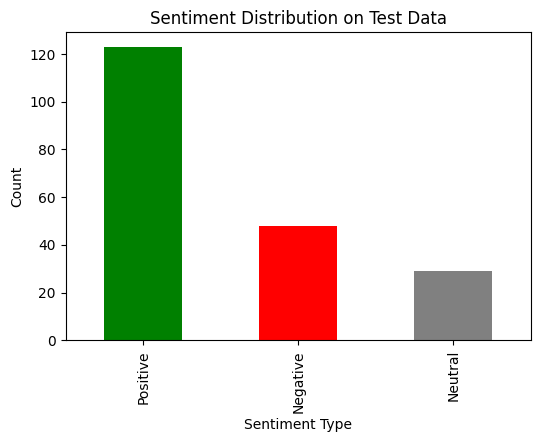

In [11]:
plt.figure(figsize = (6,4))
test_data['Sentiment'].value_counts().plot(kind = 'bar', color=['green','red','gray'])
plt.title('Sentiment Distribution on Test Data')
plt.xlabel('Sentiment Type')
plt.ylabel('Count')
plt.show()

**7. Insights/ Conclusion**

We count and display the number of positive, negative, and neutral reviews in the dataset to understand overall sentiment.

In [12]:
print("Overall Positive Reviews:", sum(test_data['Sentiment'] == 'Positive'))
print("Overall Negative Reviews:", sum(test_data['Sentiment'] == 'Negative'))
print("Overall Neutral Reviews:", sum(test_data['Sentiment'] == 'Neutral'))

Overall Positive Reviews: 123
Overall Negative Reviews: 48
Overall Neutral Reviews: 29




*   Majority of reviews are Positve, meaning customers are happy with the product.
*   Some negative reviews highlight improvement areas.
*   A few Neutral reviews indicate mixed or average opinions.

**8. Save the results**

We export the final results (reviews+ predicted sentiments) into a CSV file for submission or report use.

In [13]:
#Save final test data with sentiments
test_data.to_csv("sentiment_results.csv", index= False)
print("Results saved successfully!")

Results saved successfully!
